# Fast Fourier Transformation - Test Notebook

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:

SAMPLE_RATE = 44200 # Hertz
DURATION = 5 # Seconds

In [3]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x,y 

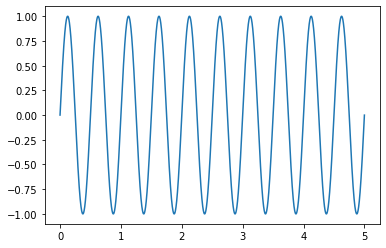

In [4]:
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()